Цель проекта:
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, 
чтобы на ранней стадии выявлять студентов, находящихся в группе риска. 

Задание:
Провести разведывательный анализ данных и составить отчёт по его результатам.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import ttest_ind

In [104]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

math = pd.read_csv('stud_math.xls')

1. Рассмотрим данные, хранящиеся в файле.

In [105]:
display(math.head(10))
math.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Мы имеем 395 строки и 29 колонок. Сведения, полученные от функции info(),
говорят о том, что во многих колонках присутствуют пустые значения.

In [106]:
#Для удобства приведем названия колонок в DataFrame к общему виду.
new_columns = []

for names in math.columns:
    new_columns.append(names.lower())
math.columns = new_columns

display(math.columns)

Index(['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
       'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

Проведем первичную обработку данных, необходимо выяснить есть ли в данных ошибки или пустоты 
и привести все к общему виду, также преобразуем данные с NaN.

In [107]:
#Создадим функцию, которая ищет столбцы с NaN.
def nan_finder(df):
    '''Функция предназначена для нахождения пустых значений с помошью метода isnull()'''
    nan_columns = []
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            nan_columns.append(column)
    return nan_columns

In [108]:
#Выведем столбцы с NaN
nan_finder(math)

['address',
 'famsize',
 'pstatus',
 'medu',
 'fedu',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'studytime, granular',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

In [109]:
#Рассмотрим числовые столбцы. Начем с столбцов, имеющих категориальные данные,
#такие как medu, fedu, traveltime, studytime, failures, famrel, freetime, goout и health.
#В этих столбцах добавим вместо NaN ещё один признак - нет данных, он будет под цифрой 0.0.
#Но сначала в столбцах medu и fedu сместим значения, чтобы они начинались с единицы.

math['medu'] = math.medu.apply(lambda x: 1.0 if x == 0.0 else 2.0 if x == 1.0 else 3.0 if x == 2.0 
                               else 4.0 if x == 3.0 else 5.0 if x == 4.0 else x)
math['fedu'] = math.fedu.apply(lambda x: 1.0 if x == 0.0 else 2.0 if x == 1.0 else 3.0 if x == 2.0 
                               else 4.0 if x == 3.0 else 5.0 if x == 4.0 else x)

In [110]:
#Исключением будет столбец failures, где учитывается количество внеучебных неудач.
#Смещать в этом столбце значения будет нелогично, поэтому все NaN будут включены
#в нулевой признак, данные о котором намного превышают все остальные по количесву на порядок.
#Это не сильно повлияет на данные, так как NaN-ок там всего 22.
math.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [111]:
#Счет количества NaN-ок.
math.failures.isnull().sum()

22

In [112]:
#Добавление нового признака - нет данных
math['medu'] = math.medu.apply(lambda x: 0.0 if pd.isnull(x) else x)
math['fedu'] = math.fedu.apply(lambda x: 0.0 if pd.isnull(x) else x)
math['traveltime'] = math.traveltime.apply(lambda x: 0.0 if pd.isnull(x) else x)
math['studytime'] = math.studytime.apply(lambda x: 0.0 if pd.isnull(x) else x)
math['failures'] = math.failures.apply(lambda x: 0.0 if pd.isnull(x) else x)
math['famrel'] = math.famrel.apply(lambda x: 0.0 if pd.isnull(x) else x)
math['freetime'] = math.freetime.apply(lambda x: 0.0 if pd.isnull(x) else x)
math['goout'] = math.goout.apply(lambda x: 0.0 if pd.isnull(x) else x)
math['health'] = math.health.apply(lambda x: 0.0 if pd.isnull(x) else x)

In [113]:
#Не ясно, какие данные содержит столбец math.['studytime, granular'],
#из-за чего нельзя сделать какие-либо выводы на основании этих данных, удалим его.
math['studytime, granular'].unique()

array([ -6.,  -9.,  -3.,  nan, -12.])

In [114]:
#Удаляем столбец.
math.drop(['studytime, granular'], inplace = True, axis = 1)

Далее с помощью применения функции unique() ко всем столбцам файла, просматриваем данные на предмет ошибок.

После просмотра результатов нигде не были выявлены ошибки или пустоты, кроме колонк fedu и famrel.
Эти колонки содержат значения не оцениваемые в данных колонках.

In [115]:
#Уникальные значения колонки fedu.
math.fedu.unique()

array([ 5.,  2.,  3.,  4., 40.,  0.,  1.])

In [116]:
#Уникальные значения колонки famrel.
math.famrel.unique()

array([ 4.,  5.,  3.,  0., -1.,  2.,  1.])

In [117]:
#Удалим строки, содержащие неверные данные.
math = math.query("fedu != 40.0")
math = math.loc[~math['famrel'].isin([-1.0])]

In [118]:
#Рассмотрим столбцы absences и score (age не рассматриваем, потому что там нет NaN-ок)
#В них также необходимо заменить NaN на какое-либо число, либо удалить, если NaN-ок не много.
math['absences'].isnull().sum()

12

In [119]:
math['score'].isnull().sum()

6

In [120]:
#Строк с NaN достаточно мало в обоих столбцах, поэтому их можно удалить, 
#что практически не скажется на данных. 
math = math.loc[~math['score'].isnull()]
math = math.loc[~math['absences'].isnull()]

2. Рассмотрим распределение признака для числовых переменных, при необходимости устраним выбросы.

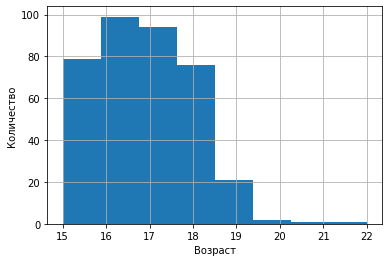

In [161]:
#Рассмотрим колонку age
math.age.hist(bins=8)
math.age.describe()
plt.xlabel('Возраст', size = 10); plt.ylabel('Количество', size = 10);

In [122]:
#Проверим колонку на выбросы воспользовавшись формулой интерквартильного расстояния.
IQR = math.age.quantile(0.75) - math.age.quantile(0.25)
perc25 = math.age.quantile(0.25)
perc75 = math.age.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


Видно, что большинство учеников имеют возраст от 16 до 18 лет, но так как суть проекта это - 
отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость,
мы не будем считать выбросом возраст учеников, равный 22.

Text(0.5, 1.0, 'Образование отца')

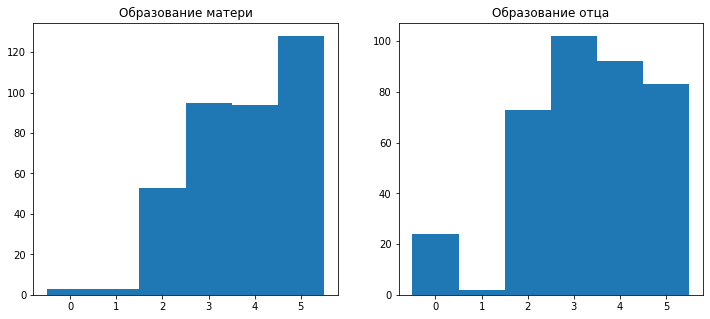

In [123]:
#Рассмотрим колонки medu и fedu
fig, axes = plt.subplots(1,2, figsize = (12,5))
axes[0].hist(math["medu"], bins=np.arange(7)-0.5)
axes[0].set_title('Образование матери')
axes[1].hist(math["fedu"], bins=np.arange(7)-0.5)
axes[1].set_title('Образование отца')
#Как видно из гистограмм, в колонках нет аномальных данных и выбросов,
#большинство родителей имеет школьное образование.

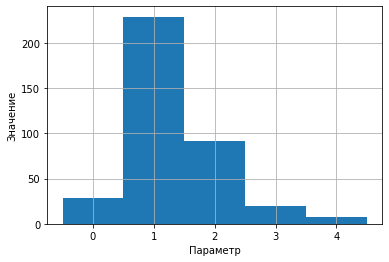

In [124]:
#Рассмотрим колонку traveltime
math.traveltime.hist(bins = np.arange(6)-0.5)
math.traveltime.describe()
plt.xlabel('Параметр', size = 10); plt.ylabel('Значение', size = 10);
#У этого признака распределение без аномалий, выбросов нет. 
#Большинство учеников учатся в школе неподалеку.

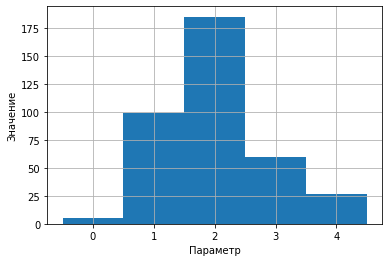

In [125]:
#Рассмотрим колонку studytime
math.studytime.hist(bins=np.arange(6)-0.5)
math.studytime.describe()
plt.xlabel('Параметр', size = 10); plt.ylabel('Значение', size = 10);
#У этого признака распределение без аномалий, выбросов нет. Видно, 
#что большое количество учащихся тратят 2-5 часов на самостоятельное обучение.

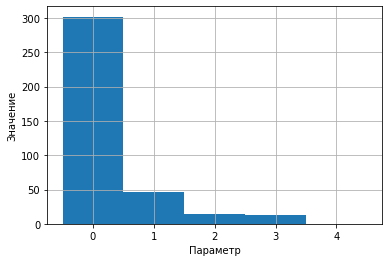

In [126]:
#Рассмотрим колонку failures
math.failures.hist(bins=np.arange(6)-0.5)
math.failures.describe()
plt.xlabel('Параметр', size = 10); plt.ylabel('Значение', size = 10);
#У этого признака распределение без аномалий, выбросов нет. 
#Очень мало учеников имеют внеучебные неудачи.

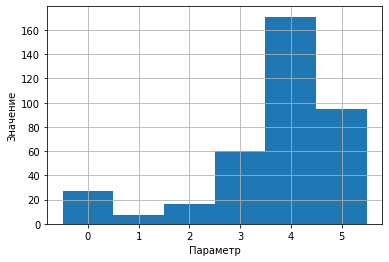

In [127]:
#Рассмотрим колонку famrel
math.famrel.hist(bins=np.arange(0,7)-0.5)
math.famrel.describe()
plt.xlabel('Параметр', size = 10); plt.ylabel('Значение', size = 10);
#У этого признака распределение без аномалий, выбросов нет. 
#У большинства учеников хорошие отношения с родителями.

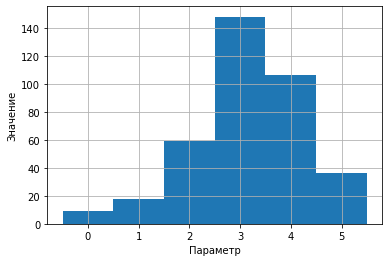

In [128]:
#Рассмотрим колонку freetime
math.freetime.hist(bins=np.arange(0,7)-0.5)
math.freetime.describe()
plt.xlabel('Параметр', size = 10); plt.ylabel('Значение', size = 10);
#У этого признака распределение без аномалий, выбросов нет. 
#У большинства учеников достаточно свободного времени.

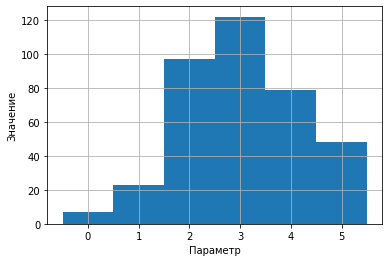

In [129]:
#Рассмотрим колонку goout
math.goout.hist(bins=np.arange(0,7)-0.5)
math.goout.describe()
plt.xlabel('Параметр', size = 10); plt.ylabel('Значение', size = 10);
#У этого признака распределение без аномалий, выбросов нет. 
#У большинства учеников есть время встретиться с друзьями.

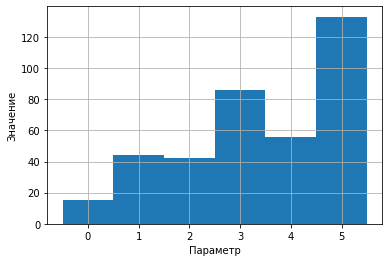

In [130]:
#Рассмотрим колонку health
math.health.hist(bins=np.arange(0,7)-0.5)
math.health.describe()
plt.xlabel('Параметр', size = 10); plt.ylabel('Значение', size = 10);
#У этого признака распределение без аномалий, выбросов нет. 
#У большинства учеников здоровье в пределе нормы.

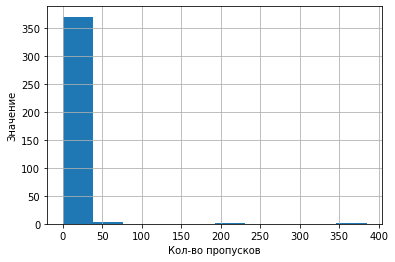

In [131]:
#Рассмотрим колонку absences
math.absences.hist()
math.absences.describe()
plt.xlabel('Кол-во пропусков', size = 10); plt.ylabel('Значение', size = 10);
#Видно, что в колонке присутствуют выбросы, так как разброс значений очень велик.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [0.0, 20.0].


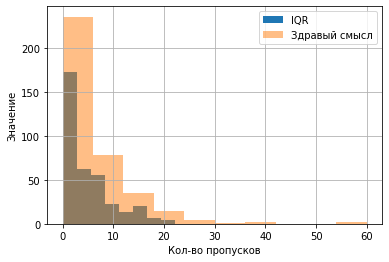

In [132]:
IQR = math.absences.quantile(0.75) - math.absences.quantile(0.25)
perc25 = math.absences.quantile(0.25)
perc75 = math.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25, l=perc75 + 1.5*IQR))

math.absences.loc[math.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 9, range = (0, 25), label = 'IQR')

math.absences.loc[math.absences <= 60].hist(
alpha = 0.5, bins = 10, range = (0, 60), label = 'Здравый смысл')
 
plt.legend();
plt.xlabel('Кол-во пропусков', size = 10); plt.ylabel('Значение', size = 10); 

Судя по границе выбросов, очень мало учеников пропускали занятие больше 20 раз, но возможно были ученики,
которые постоянно болеют или имеют какие-то подобные ситуации, поэтому оставим учников,
которые пропустили меньше 60 занятий.

In [133]:
#Уберем из файла учеников, пропустивших больше 60 занятий.
math = math.loc[math.absences <= 60]

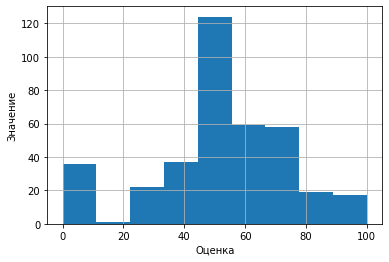

In [134]:
#Рассмотрим колонку score
math.score.hist(bins = 9)
math.score.describe()
plt.xlabel('Оценка', size = 10); plt.ylabel('Значение', size = 10);
#Проверим пристутствуют ли в данных выбросы

In [135]:
IQR = math.score.quantile(0.75) - math.score.quantile(0.25)
perc25 = math.score.quantile(0.25)
perc75 = math.score.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


Данные выбросов не имеют, большинство оценок распределены между 40.0 и 70.0 баллами, 
оценка велась по 100 бальной шкале, остается вопрос с тем, почему так много человек написали экзамен на 0 баллов,
но мы оставим эти данные, возможно они коррелируют с какими-то признаками в других столбцах.

3. Проведем корреляционный анализ 

In [136]:
#Посмотрим какие данные скоррелированы у количественных переменных
math_corr = math[['age', 'absences', 'score']]
math_corr.corr()

,age,absences,score
age,1.000000,0.166541,-0.148709
absences,0.166541,1.000000,0.044978
score,-0.148709,0.044978,1.000000


Как видно из данных, количественные столбцы никак не коррелируют.
Присутствует отрицательная корреляция между возрастом и оценкой корреляции,
то есть с увеличением возраста оценка уменьшается.
Интересная корреляция также пристутствует у колонок absences и score,
получается, что при увеличении пропусков оценка немного растет.

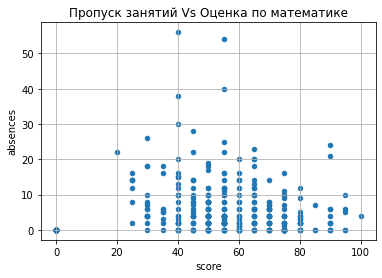

In [137]:
#Для получении дополнительной информации о взаимосвязи построим график типа scatter plot:
math_corr.plot(x = 'score', 
        y = 'absences', 
        kind = 'scatter', 
        grid = True, 
        title = 'Пропуск занятий Vs Оценка по математике')

Как видно из графика, большая плотность точек расположена на промежутке от 0 до 20 пропусков,
из-за того, что остались выбросы корреляция, возможно, получилась не корректной, попробуем ещё раз ее 
построить, полностью убрав выбросы.

In [138]:
math_corr = math_corr.loc[math_corr.absences <= 20]
math_corr.corr()

,age,absences,score
age,1.000000,0.158915,-0.159303
absences,0.158915,1.000000,0.084593
score,-0.159303,0.084593,1.000000


Корреляция осталось положительной, но все равно очень маленькой величиной.

In [139]:
#Для категориальных переменных построим бокспроты от целевой переменной
def get_boxplot(column):
    '''Функция предназначена для построения боксплота от целевой переменной для заданных колонок файла'''
    fig, ax = plt.subplots(figsize = (7,5))
    sns.boxplot(x=column, y='score', data=math, ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

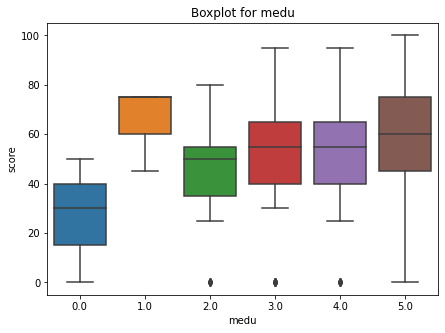

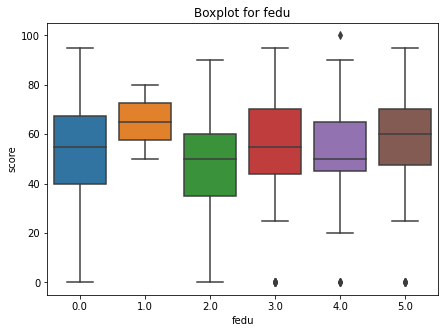

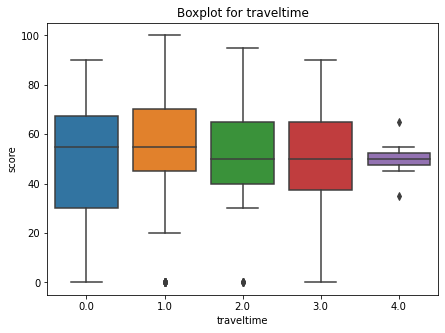

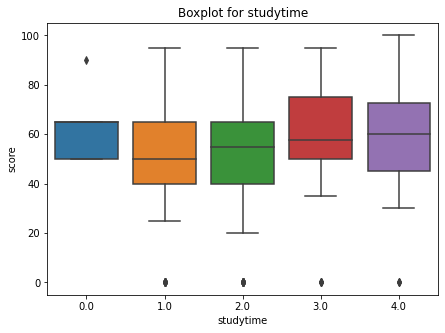

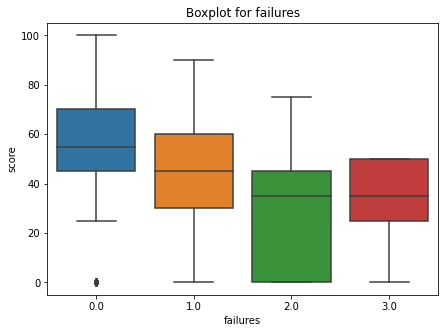

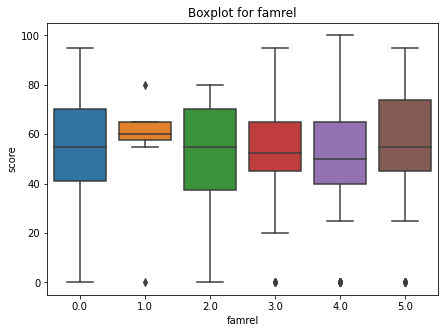

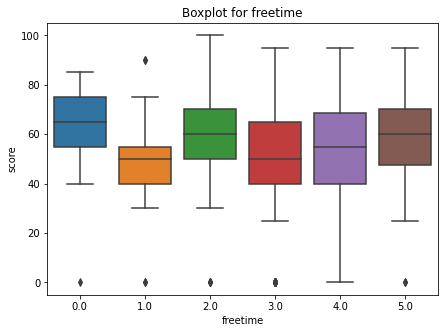

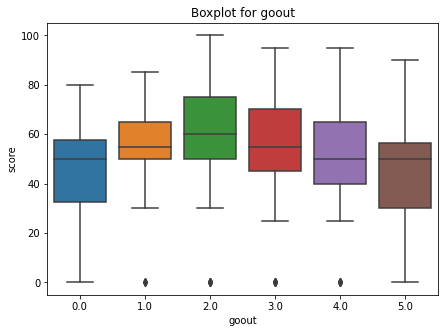

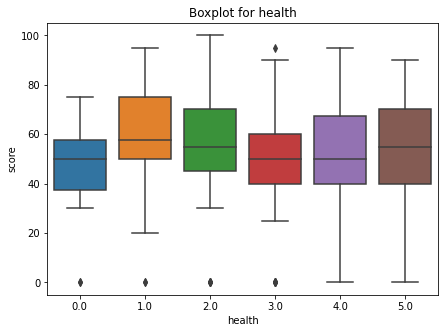

In [140]:
for col in ['medu', 'fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

Судя по графикам выше, похоже, что все параметры могут влиять на оценку по математике. 

Посмотрим также на распределение значений категориального признака от целевой переменной 
с помощью Density plot.

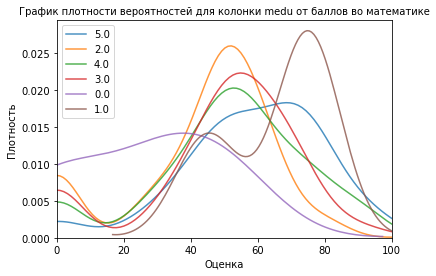

In [143]:
math_corr = math[['medu', 'fedu', 'traveltime', 'studytime', 'failures', 
                  'famrel', 'freetime', 'goout', 'health', 'score']]
medu = list(math_corr['medu'].unique())
fedu = list(math_corr['fedu'].unique())
traveltime = list(math_corr['traveltime'].unique())
studytime = list(math_corr['studytime'].unique())
failures = list(math_corr['failures'].unique())
famrel = list(math_corr['famrel'].unique())
freetime = list(math_corr['freetime'].unique())
goout = list(math_corr['goout'].unique())
health = list(math_corr['health'].unique())

for i in medu:
    subset = math_corr[math_corr['medu'] == i]
    
    sns.kdeplot(subset['score'],
               label = i, shade = False, alpha = 0.8)
plt.xlim(0,100)
plt.xlabel('Оценка', size = 10); plt.ylabel('Плотность', size = 10); 
plt.title('График плотности вероятностей для колонки medu от баллов во математике', size = 10);

Как видно из графика, в среднем наиболее высокие баллы получают те, у кого мать имеет
высшее образование (5.0) и самые низкие те, у кого мать имеет 1 - 4 класса 
школьного образования. Так как количество детей, у которых мать не имеет образования, 
крайне мала, не будет учитывть пик коричневой линии (1.0).

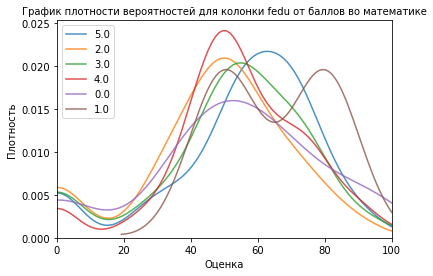

In [144]:
for i in fedu:
    subset = math_corr[math_corr['fedu'] == i]
    
    sns.kdeplot(subset['score'],
               label = i, shade = False, alpha = 0.8)
plt.xlim(0,100)
plt.xlabel('Оценка', size = 10); plt.ylabel('Плотность', size = 10); 
plt.title('График плотности вероятностей для колонки fedu от баллов во математике', size = 10);

График имеет те же особенности, что и придыдущий.

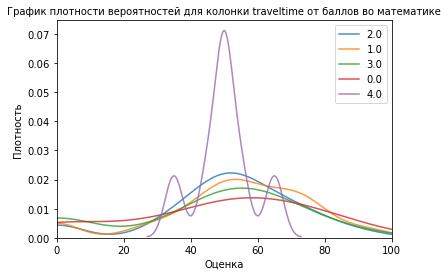

In [145]:
for i in traveltime:
    subset = math_corr[math_corr['traveltime'] == i]
    
    sns.kdeplot(subset['score'],
               label = i, shade = False, alpha = 0.8)
plt.xlim(0,100)
plt.xlabel('Оценка', size = 10); plt.ylabel('Плотность', size = 10); 
plt.title('График плотности вероятностей для колонки traveltime от баллов во математике', size = 10);

Большой фиолетовый пик скорее всего объясняется очень малым количеством данных
об учениках, тративших больше 60 минут на поездку. Если его не рассматривать, то 
видно, что на многих участках линии сливаются, поэтому эту колонку в дальнейшем 
учитывать не стоит.

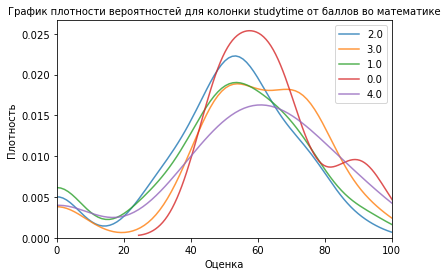

In [146]:
for i in studytime:
    subset = math_corr[math_corr['studytime'] == i]
    
    sns.kdeplot(subset['score'],
               label = i, shade = False, alpha = 0.8)
plt.xlim(0,100)
plt.xlabel('Оценка', size = 10); plt.ylabel('Плотность', size = 10); 
plt.title('График плотности вероятностей для колонки studytime от баллов во математике', size = 10);

Время на учёбу помимо школы в неделю влияет на баллы по математике.
80 баллов наиболее вероятно получат ученики занимающиеся 5-10 часов,
но уже 100 баллов - ученики занимающиеся больше 10 часов.

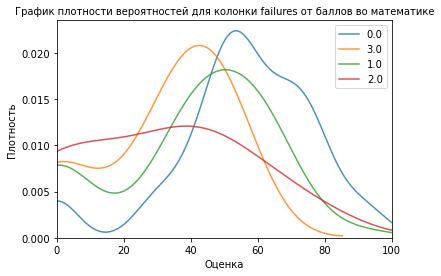

In [147]:
for i in failures:
    subset = math_corr[math_corr['failures'] == i]
    
    sns.kdeplot(subset['score'],
               label = i, shade = False, alpha = 0.8)
plt.xlim(0,100)
plt.xlabel('Оценка', size = 10); plt.ylabel('Плотность', size = 10); 
plt.title('График плотности вероятностей для колонки failures от баллов во математике', size = 10);

Количество внеучебных неудач влияет на получаемые баллы, чем меньше неудач,
тем выше оценка, однако в данных присутствует существенный перекос в значениях,
в пользу отсутствия неудач (0.0), поэтому скорее всего будет некорректно 
дальше использовать этот столбец.

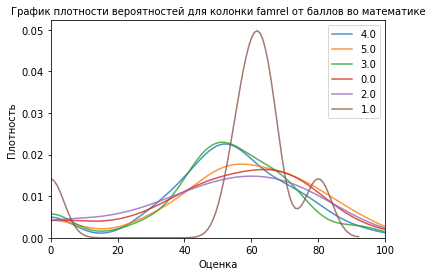

In [148]:
for i in famrel:
    subset = math_corr[math_corr['famrel'] == i]
    
    sns.kdeplot(subset['score'],
               label = i, shade = False, alpha = 0.8)
plt.xlim(0,100)
plt.xlabel('Оценка', size = 10); plt.ylabel('Плотность', size = 10); 
plt.title('График плотности вероятностей для колонки famrel от баллов во математике', size = 10);

На графике видно увеличение вероятности получения более высокой оценки
с отличными отношениями с родителями и более низкой - с плохими. 
Коричневый пик (1.0) из-за очень малого количества данных учитывать не стоит.

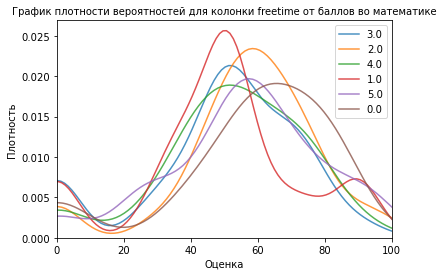

In [149]:
for i in freetime:
    subset = math_corr[math_corr['freetime'] == i]
    
    sns.kdeplot(subset['score'],
               label = i, shade = False, alpha = 0.8)
plt.xlim(0,100)
plt.xlabel('Оценка', size = 10); plt.ylabel('Плотность', size = 10); 
plt.title('График плотности вероятностей для колонки freetime от баллов во математике', size = 10);

По графику можно сделать следующий вывод: наблюдается тенденция на увеличение вероятности 
получения лучшей оценки от уменьшения количества свободного времени, однако на 100
баллах выше всего находится линия 5.0, где свободного времени очень много.
Это можно расценить либо как случайность, потому что учеников с таким показателем очень мало, 
либо как отсутствие стресса и хороший отдых перед экзаменом.

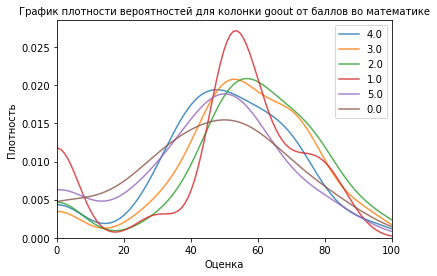

In [150]:
for i in goout:
    subset = math_corr[math_corr['goout'] == i]
    
    sns.kdeplot(subset['score'],
               label = i, shade = False, alpha = 0.8)
plt.xlim(0,100)
plt.xlabel('Оценка', size = 10); plt.ylabel('Плотность', size = 10); 
plt.title('График плотности вероятностей для колонки goout от баллов во математике', size = 10);

Время, проведенное с друзьями не сильно сказывается на оценке по математике, 
однако видна тенденция на то, что чем реже ученик гуляет, тем больше вероятность 
получить оценку выше.

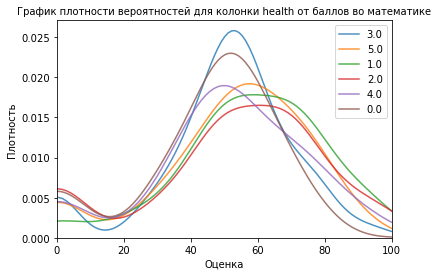

In [151]:
for i in health:
    subset = math_corr[math_corr['health'] == i]
    
    sns.kdeplot(subset['score'],
               label = i, shade = False, alpha = 0.8)
plt.xlim(0,100)
plt.xlabel('Оценка', size = 10); plt.ylabel('Плотность', size = 10); 
plt.title('График плотности вероятностей для колонки health от баллов во математике', size = 10);

По графику видно, что люди с очень плохим и очень хорошим здоровьем имеют высокую вероятность
получить 60 и больше баллов, с низкими баллами картина не очень понятная, так как
получить 0 баллов высока вероятность у детей с плохим зворовьем (2.0), а с очень
плохим довольно низкая.

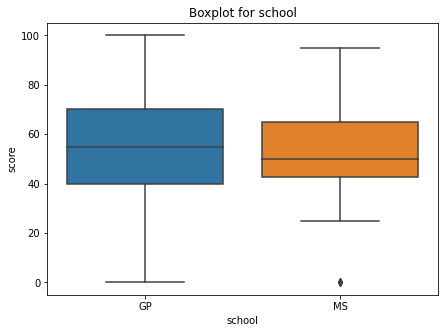

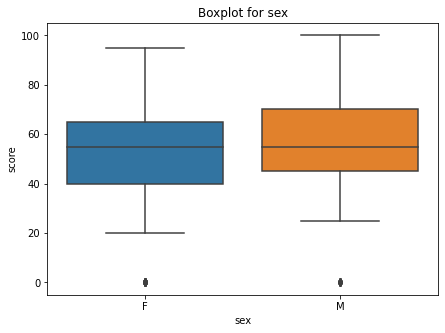

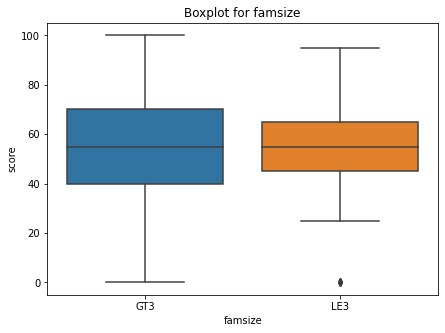

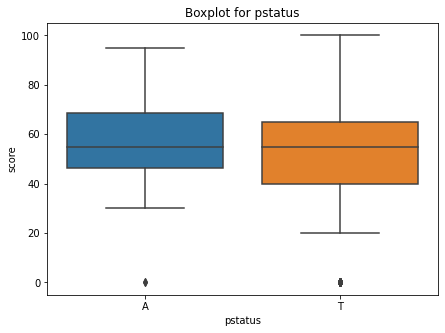

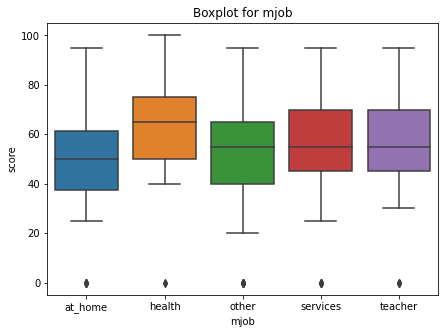

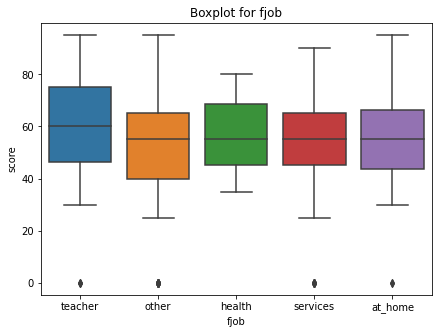

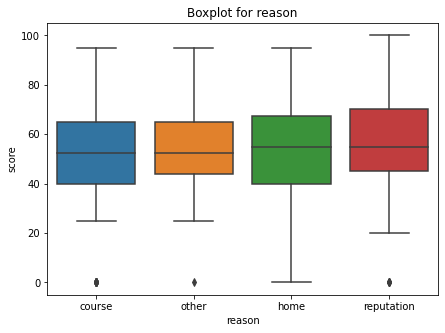

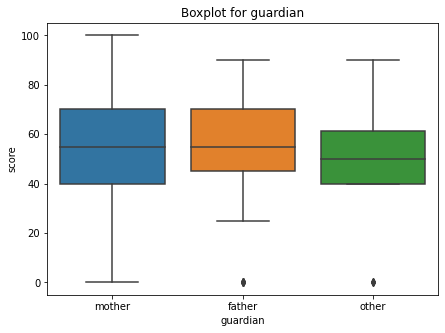

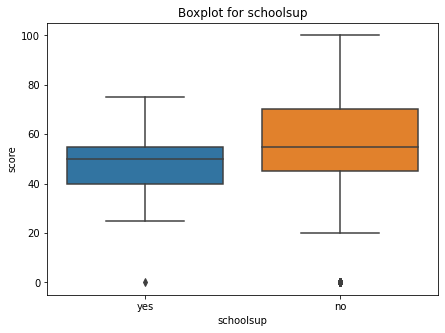

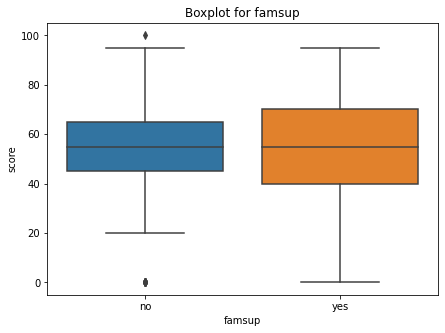

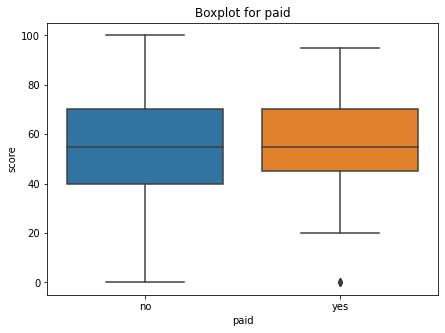

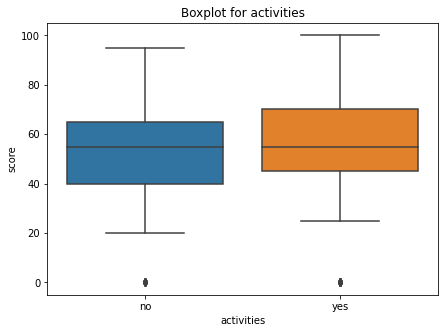

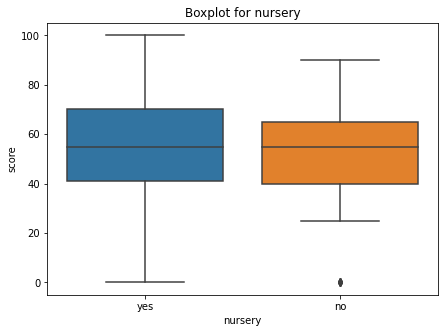

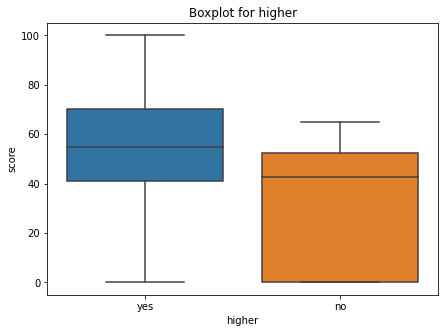

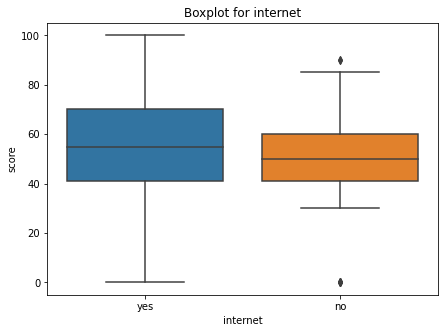

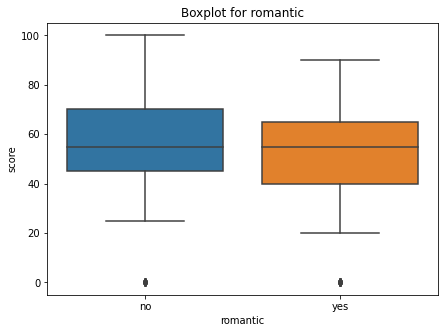

In [157]:
#Рассмотрим распределения оценок по математике в зависимости от значения номинативных переменных
for col in ['school', 'sex', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
           'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Отсутствует влияние на оценку колонок: 
1.school, потому что данных об учащихся одной школы почти на порядок больше, чем о другой;
2.guardian, так как в данных есть существенный перевес в пользу опекунов матерей;
3.pstatus, также потому, что данных о парах, живущих вместе почти на порядок больше;
4.schoolsup, та же причина.
В остальных графиках можно заметить интересные закономерности, например, на графике для колонки mjob лучшие баллы
получают ученики, у которых матери работают в области здравоохранения, а у отцов (fjob) в области образования.
Также очень заметна корреляция оценки с желанием ученика получить высшее образование, семейной поддрежкой и
наличием интернета дома.

In [158]:
#Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, 
#с помощью теста Стьюдента. Проверим нулевую гипотезу о том, 
#что распределения баллов по математике по различным параметрам неразличимы:

def get_stat_dif(column):
    '''Функция предназначена для проведения Теста Стьюдента'''
    cols = math.loc[:, column].value_counts().index #Выделяем интексы колонки
    combinations_all = list(combinations(cols, 2)) #Делаем комбинации индексов
    for comb in combinations_all:
        #Проверяем нулевую гипотезу с помощью теста Стьюдента
        if ttest_ind(math.loc[math.loc[:, column] == comb[0], 'score'], 
                        math.loc[math.loc[:, column] == comb[1], 'score']).pvalue\
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [159]:
for col in ['school', 'sex', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian', 'schoolsup',
           'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Как мы видим, серьёзно отличаются четыре параметра: sex,  mjob, higher и  romantic. 
Оставим эти переменные в датасете для дальнейшего построения модели. 
Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: 
sex,  mjob, higher, romantic, fedu, medu, studytime, famrel, health.

4. Итог

In [164]:
math_for_model = math.loc[:, ['sex', 'mjob', 'studytime', 'higher', 'romantic', 
                              'fedu', 'medu', 'famrel', 'health']]

In [165]:
math_for_model.head()

,sex,mjob,studytime,higher,romantic,fedu,medu,famrel,health
0,F,at_home,2.0,yes,no,5.0,5.0,4.0,3.0
1,F,at_home,2.0,yes,no,2.0,2.0,5.0,3.0
2,F,at_home,2.0,yes,NaN,2.0,2.0,4.0,3.0
3,F,health,3.0,yes,yes,3.0,5.0,3.0,5.0
4,F,other,2.0,yes,no,4.0,4.0,4.0,5.0


5. Выводы

Итак, в результате EDA для анализа влияния условий жизни учащихся в возрасте 
от 15 до 22 лет на их успеваемость по математике, были получены следующие выводы:

1. В данных достаточно много пустых значений, в категориальных столбцах для них был добавлен новый признак.
2. Выбросы были найдены в столбцах с пропущенными занятиями, образованием отца и отношениями в семье,
что позволяет сделать вывод о том, что данные достаточно чистые.
3. По ходу работы было выявлено, что на оценку по математике сильно влияет желание ученика 
поступить в университет; время на учёбу помимо школы; работа и образование матери и т.д.
4. Самые важные параметры, которые предлагается использовать в дальнейшем
для построения модели, это sex, mjob, studytime, higher, romantic, fedu, medu, famrel, health.